<a href="https://colab.research.google.com/github/Uliana-san/Japan/blob/master/project_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Данные

In [50]:
# 1. запускаете эту ячейку
# 2. ждёте
# 3. внизу появляется кнопка с загрузкой с компьютера
# 4. выбираете файл на компьютере и загружаете
# 5. доооолго ждёте, пока` он скачается -_-
from google.colab import files
uploaded = files.upload()

Saving AGT.csv to AGT (2).csv


In [51]:
!head AGT.csv

tid;sid;cent;title;author;translator;year_trans;change_range;change_type;dia_change;add_W;ag_orig;ag_orig_range;ag_otype;ag_trans;ag_ttype;ag_tt_range;hedge_type;pred_orig;pred_trans;pred_ttype;pred_tt_range;text_orig;text_trans;;;;
1;1;19;Idiot;Dostoevsky;Nakayama;1934;4;act_reduct;0;;впечатление;5;feeling;впечатление;feeling;5;;оставлять;nokoru;VINTR;5;давешнее впечатление почти не оставляло его;さっきの印象が、まだほとんど残っていたが、;;;;
1;2;19;Idiot;Dostoevsky;Kimura;1970;5;hedge_body;0;hedge;впечатление;5;feeling;впечатление;feeling;5;心;оставлять;saru;VTRH;6;давешнее впечатление почти не оставляло его;先ほどの印象はあれからずっと彼の心を去らなかったので、;;;;
1;3;19;Idiot;Dostoevsky;Mochizuki;2010;4;act_reduct;0;;впечатление;5;feeling;впечатление;feeling;5;;оставлять;nokoru;VINTR;5;давешнее впечатление почти не оставляло его;さっきの印象はほとんどそのままに残っていた;;;;
1;4;19;Idiot;Dostoevsky;Kameyama;2015;4;act_reduct;0;hedge;впечатление;5;feeling;впечатление;feeling;5;心;оставлять;hanareru;VINTRH;4;давешнее впечатление почти не оставляло его;

Предобработка

In [103]:
df_AGT = pd.read_csv('AGT.csv', index_col='sid', sep = ';')
df_AGT.dropna(subset=["ag_orig"], inplace=True)
df_AGT.dropna(subset=["ag_orig_range"], inplace=True)
df_AGT

,tid,cent,title,author,translator,year_trans,change_range,change_type,dia_change,add_W,ag_orig,ag_orig_range,ag_otype,ag_trans,ag_ttype,ag_tt_range,hedge_type,pred_orig,pred_trans,pred_ttype,pred_tt_range,text_orig,text_trans,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,19.0,Idiot,Dostoevsky,Nakayama,1934.0,4.0,act_reduct,0.0,NaN,впечатление,5.0,feeling,впечатление,feeling,5.0,NaN,оставлять,nokoru,VINTR,5.0,давешнее впечатление почти не оставляло его,さっきの印象が、まだほとんど残っていたが、,NaN,NaN,NaN,NaN
2.0,1.0,19.0,Idiot,Dostoevsky,Kimura,1970.0,5.0,hedge_body,0.0,hedge,впечатление,5.0,feeling,впечатление,feeling,5.0,心,оставлять,saru,VTRH,6.0,давешнее впечатление почти не оставляло его,先ほどの印象はあれからずっと彼の心を去らなかったので、,NaN,NaN,NaN,NaN
3.0,1.0,19.0,Idiot,Dostoevsky,Mochizuki,2010.0,4.0,act_reduct,0.0,NaN,впечатление,5.0,feeling,впечатление,feeling,5.0,NaN,оставлять,nokoru,VINTR,5.0,давешнее впечатление почти не оставляло его,さっきの印象はほとんどそのままに残っていた,NaN,NaN,NaN,NaN
4.0,1.0,19.0,Idiot,Dostoevsky,Kameyama,2015.0,4.0,act_reduct,0.0,hedge,впечатление,5.0,feeling,впечатление,feeling,5.0,心,оставлять,hanareru,VINTRH,4.0,давешнее впечатление почти не оставляло его,さっき受けた印象がなかなか心から離れず、,NaN,NaN,NaN,NaN
5.0,1.0,19.0,Idiot,Dostoevsky,Nakayama,1934.0,1.0,sub_change,1.0,NaN,мысль,4.0,intellect,человек,human,6.0,NaN,поразить,suru,VTR,7.0,его неприятно поразила и мысль о записке,頼まれたことを思い、ガーニャがアグラーヤにやる手紙のことを思うと、不愉快な気持がしてならなかった。,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680.0,21.0,20.0,Tsentrovka,Tokareva,KNumano,1998.0,1.0,sub_change,1.0,NaN,обстоятельства,3.0,circumstances,человек,human,6.0,NaN,вдохновлять,kandousuru,VINTR,5.0,это вдохновило меня до озноба.,そう思うと、背筋がぞくぞくするほど感動してしまった。,NaN,NaN,NaN,NaN
681.0,21.0,20.0,Tsentrovka,Tokareva,KNumano,1998.0,6.0,0,0.0,NaN,смерть,3.0,circumstances,смерть,circumstances,3.0,NaN,завладеть,gyuujiru,VTR,7.0,Смерть пришла как дело и жизнью завладела,死がなすべき務めのようにやって来て、生を牛耳ってしまった,NaN,NaN,NaN,NaN
682.0,21.0,20.0,Tsentrovka,Tokareva,KNumano,1998.0,6.0,0,0.0,NaN,игла,1.0,thing,игла,thing,1.0,NaN,пронзить,tsukisasu,VTR,7.0,Игла жалости пронзила меня насквозь.,哀れみのトゲが奥の奥まで突き刺さった,NaN,NaN,NaN,NaN


In [69]:
df_AGT = pd.read_csv('AGT.csv', sep = ';')
df_AGT.dropna(inplace=True)
df_AGT


,tid,sid,cent,title,author,translator,year_trans,change_range,change_type,dia_change,add_W,ag_orig,ag_orig_range,ag_otype,ag_trans,ag_ttype,ag_tt_range,hedge_type,pred_orig,pred_trans,pred_ttype,pred_tt_range,text_orig,text_trans,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27


In [57]:
print(df_AGT['ag_orig'].iloc[8])

чувство


In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# Загрузили стопслова для русского языка из nltk
stopset = stopwords.words('russian')
stopset[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# Токенизация, чистка
def tokenize(msg):
    # убрали знаки препинания и привели к нижнему регистру
    msg = re.sub('[!"?/\\().:;,-]', '', msg).lower()
    msg = [w for w in word_tokenize(msg) if not w in stopset] # токенизировали и избавились от стоп слов
    return msg

In [63]:
tokenize(df_AGT['ag_orig'].iloc[7])[:10]

['мысль']

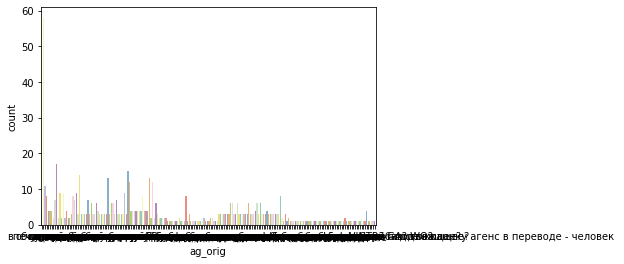

In [64]:
sns.countplot(x=df_AGT['ag_orig'], data=df_AGT, palette="Set3") 

Tf-idf преобразование

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
bow_tfidf = TfidfVectorizer(tokenizer=tokenize)
bowed_AGT = bow_tfidf.fit_transform(df_AGT['ag_orig'])

In [85]:
bowed_AGT

<688x213 sparse matrix of type '<class 'numpy.float64'>'
	with 689 stored elements in Compressed Sparse Row format>

Кластеризация

In [0]:
from sklearn.cluster import KMeans

In [109]:
model = KMeans(n_clusters=9, init='k-means++', max_iter=100, n_init=1, random_state=37)
model.fit(bowed_AGT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=9, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=37, tol=0.0001, verbose=0)

In [110]:
len(model.cluster_centers_)

9

In [113]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1] # индексы слов, по мере убывания близости к центру
terms = bow_tfidf.get_feature_names() # массив слов в том порядке, в котором их помнит kmeans
for i in range(9):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :3]: # печатаем 10 самых близких
        print(terms[ind])
    print()

Top terms per cluster:
Cluster 0:
судьба
улыбка
жизнь

Cluster 1:
поцелуй
это
лоб

Cluster 2:
мысль
испуг
кровь

Cluster 3:
радость
это
кабинет

Cluster 4:
тоска
это
кабинет

Cluster 5:
смерть
это
кабинет

Cluster 6:
обстоятельства
это
испуг

Cluster 7:
чувство
это
испуг

Cluster 8:
дрожь
это
кабинет



Оценка

In [0]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

In [0]:
labels = df_AGT.ag_orig_range # истинные метки событий
clust_labels = model.labels_ # метки номеров кластеров, возвращённых алгортмом

Меряем Adjusted Rand Index.

Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки.

In [105]:
print("Adjusted Rand-Index:",  adjusted_rand_score(labels, clust_labels))

ValueError: ignored

Меряем гомогенность, полноту и V-меру.

In [106]:
print("Гомогенность:", homogeneity_score(labels, clust_labels))
print("Полнота:", completeness_score(labels, clust_labels))
print("V-мера",  v_measure_score(labels, clust_labels))

ValueError: ignored